# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [482]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import math

In [483]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
5,1,California,Texas,1760
6,1,California,Indiana,2194
7,1,Arizona,Texas,1009
8,1,Texas,Louisiana,432
9,1,Texas,Florida,873


DiGraph with 29 nodes and 72 edges


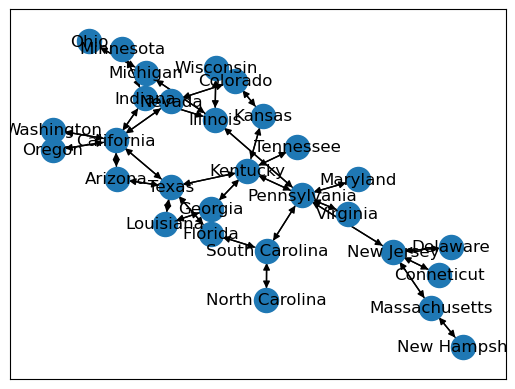

In [484]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance')
Mississippi_Graph = Mississippi_Graph.to_directed(as_view=False)
nx.draw_networkx(Mississippi_Graph,with_labels=True)
print(Mississippi_Graph)

In [485]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

In [486]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [487]:
def entropic_degree(graph, weight):
    out = defaultdict(dict)
    out2 = defaultdict(dict)
    out3 = defaultdict(dict)
    out4 = defaultdict(dict)
    df = pd.DataFrame(columns=['Node'])
    d = {}
    e = {}
    f = {}
    g = {}
    global h
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            distance = graph[i2][i3][weight]
            out[i2][i3] = distance
    for i2 in list(graph):
        key = str(i2)
        d[key] = sum(out[i2].values())
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            pij = out[i2][i3] / d[i2]
            log_pij = math.log10(pij)
            pij_multiplied_log_pij = pij * log_pij
            out2[i2][i3] = pij_multiplied_log_pij
    for i2 in list(graph):
        key = str(i2)
        e[key] = sum(out2[i2].values())
    for i2 in list(graph):
        key = str(i2)
        f[key] = 1 - e[key]
    for i2 in list(graph):
        key = str(i2)
        g[key] = d[key] * f[key]
    
    h = pd.DataFrame.from_dict(g, orient='index',)
    h.rename(columns = {0: 'Entropic_Degree'}, inplace = True)
    h.sort_values(by=['Entropic_Degree'], ascending=False, inplace=True)
    return h

In [488]:
def demand_adjusted_entropic_degree(graph, weight, demand):
    a = entropic_degree(graph, weight)
    j = {}
    l = {}
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
    highest = max(j.values())
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
        for k in a.index:
            if k == key:
                l[key] = (a['Entropic_Degree'][k] / 2) * (1 + (j[key]/highest))
    m = (pd.DataFrame.from_dict(l, orient='index').rename_axis('State').reset_index())
    m.rename(columns = {0: 'Demand_Adjusted_Entropic_Degree'}, inplace = True)
    m.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
    m.to_excel("demand_adjusted_entropic_degree.xlsx")    
    return m

In [489]:
def closeness_centrality(graph,weight):
    c = list(graph.nodes)
    df = pd.DataFrame(columns=['State','Closeness_centrality'])
    for i in c:
        a = nx.closeness_centrality(graph,i,weight)
        new_row = {'State': i, 'Closeness_centrality': a}
        df = df.append(new_row, ignore_index=True)
    df.sort_values(by=['Closeness_centrality'], ascending=False, inplace=True)
    df.to_excel("closeness_centrality.xlsx")    
    return df

In [490]:
def shortest_path(graph,location,weight):
    df3 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i]}
        df3 = df3.append(new_row, ignore_index=True)
    df3.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df3.to_excel("shortest_path.xlsx")
    return df3
    

In [491]:
def shortest_path_product1(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4.to_excel("shortest_path_product1.xlsx")
    return df4

In [492]:
def shortest_path_product2(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4['Total_distance'].sum()/df4['Warehouse_size'].sum()


In [493]:
def average_shortest_path(graph,location,weight):
    b = nx.shortest_path_length(graph,location,weight=weight)
    average_shortest_path = sum(b.values()) / (len(b) - 1)
    return average_shortest_path

In [494]:
def betweenness_centrality(graph, weight):
    df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
    d = nx.betweenness_centrality(graph,weight=weight)
    for i in d:
        new_row = {'State': i, 'Betweenness_centrality': d[i]}
        df1 = df1.append(new_row, ignore_index=True)
    df1.sort_values(by=['Betweenness_centrality'], ascending=False, inplace=True)
    df1.to_excel("betweenness_centrality.xlsx")    
    return df1

In [495]:
def metrics_graph(graph,weight,demand,location):
    c = closeness_centrality(graph,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)
    
    import warnings
    warnings.filterwarnings("ignore")

In [527]:
metrics_graph(graph=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Louisiana')


Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Minnesota,3034
27,Ohio,2889
26,Washington,2885
25,Oregon,2728
24,Michigan,2635
23,Wisconsin,2508
22,Indiana,2452
21,Nevada,2322
20,Illinois,2244
19,California,2192


Average shortest path to production center:


1826.9642857142858

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.576720
9,Kentucky,0.404762
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.174603
3,Nevada,0.171958
23,Colorado,0.129630
6,Indiana,0.124339
12,South Carolina,0.108466


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6477.543915
5,Texas,5023.069451
6,Indiana,4140.262353
9,Kentucky,2601.372566
14,Pennsylvania,2300.594197
3,Nevada,2214.239695
25,Illinois,1397.098262
7,Louisiana,1244.380678
4,Arizona,1216.949336
8,Florida,1158.102446


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Minnesota,3034,820000,2487880000
27,Ohio,2889,1855000,5359095000
26,Washington,2885,2280000,6577800000
25,Oregon,2728,855000,2332440000
24,Michigan,2635,1000000,2635000000
23,Wisconsin,2508,1100000,2758800000
22,Indiana,2452,5450000,13363400000
21,Nevada,2322,2150000,4992300000
20,Illinois,2244,6012000,13490928000
19,California,2192,14123800,30959369600


Total distance per product=


1123.589987463836

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000814,0.576720,2300.594197,1.079669
1,Kentucky,0.000774,0.404762,2601.372566,0.814831
25,California,0.000427,0.174603,6477.543915,0.482736
13,Indiana,0.000619,0.124339,4140.262353,0.318667
9,Illinois,0.000665,0.298942,1397.098262,0.277687
20,Texas,0.000538,0.082011,5023.069451,0.221480
24,Nevada,0.000436,0.171958,2214.239695,0.166137
2,New Jersey,0.000760,0.267196,573.837256,0.116592
15,Kansas,0.000603,0.174603,786.630322,0.082779
21,Colorado,0.000503,0.129630,1000.317272,0.065257


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE LOUISIANA

In [522]:
Mississippi_Graph2= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance' )
a = nx.minimum_spanning_tree(Mississippi_Graph2, weight='Distance', algorithm='kruskal', ignore_nan=False)


DiGraph with 29 nodes and 56 edges


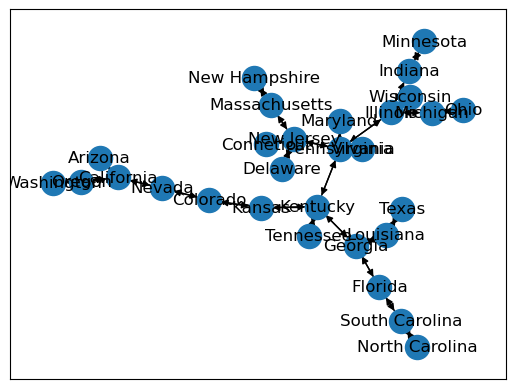

In [523]:
bb = a.to_directed(as_view=False)
nx.draw_networkx(bb,with_labels=True)
print(bb)

In [526]:
nx.shortest_path_length(bb,'Kentucky',"Tennessee",'Distance')

210

In [499]:
metrics_graph(graph=bb,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3969
27,Washington,3910
26,Oregon,3750
25,California,3214
24,Nevada,3084
23,Minnesota,3034
22,Ohio,2889
21,Michigan,2635
20,Wisconsin,2508
19,Indiana,2452


Average shortest path to production center:


2054.0714285714284

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
14,Pennsylvania,2808.545510
9,Kentucky,1560.525106
25,Illinois,1397.098262
2,California,1276.282457
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
7,Louisiana,726.096125
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3969,3210500,12742474500
27,Washington,3910,2280000,8914800000
26,Oregon,3750,855000,3206250000
25,California,3214,14123800,45393893200
24,Nevada,3084,2150000,6630600000
23,Minnesota,3034,820000,2487880000
22,Ohio,2889,1855000,5359095000
21,Michigan,2635,1000000,2635000000
20,Wisconsin,2508,1100000,2758800000
19,Indiana,2452,5450000,13363400000


Total distance per product=


1721.1839743705093

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Pennsylvania,0.000737,0.656085,2808.545510,1.357487
0,Kentucky,0.000748,0.664021,1560.525106,0.774849
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
12,Florida,0.000556,0.137566,438.190976,0.033511


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE PENNSYLVANIA

In [500]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000
metrics_graph(graph=bb,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3598
27,Washington,3539
26,Oregon,3379
25,California,2843
24,Nevada,2713
23,Texas,1927
22,North Carolina,1812
21,Colorado,1723
20,South Carolina,1585
19,Minnesota,1539


Average shortest path to production center:


1357.392857142857

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
14,Pennsylvania,2808.545510
9,Kentucky,1560.525106
25,Illinois,1397.098262
2,California,1276.282457
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
7,Louisiana,726.096125
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3598,3210500,11551379000
27,Washington,3539,2280000,8068920000
26,Oregon,3379,855000,2889045000
25,California,2843,14123800,40153963400
24,Nevada,2713,2150000,5832950000
23,Texas,1927,8834000,17023118000
22,North Carolina,1812,397800,720813600
21,Colorado,1723,1000000,1723000000
20,South Carolina,1585,2340000,3708900000
19,Minnesota,1539,820000,1261980000


Total distance per product=


943.9459365434177

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Pennsylvania,0.000737,0.656085,2808.545510,1.357487
0,Kentucky,0.000748,0.664021,1560.525106,0.774849
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
12,Florida,0.000556,0.137566,438.190976,0.033511


In [501]:
metrics_graph(graph=bb,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3598
27,Washington,3539
26,Oregon,3379
25,California,2843
24,Nevada,2713
23,Texas,1927
22,North Carolina,1812
21,Colorado,1723
20,South Carolina,1585
19,Minnesota,1539


Average shortest path to production center:


1357.392857142857

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
14,Pennsylvania,2808.545510
9,Kentucky,1560.525106
25,Illinois,1397.098262
2,California,1276.282457
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
7,Louisiana,726.096125
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3598,3210500,11551379000
27,Washington,3539,2280000,8068920000
26,Oregon,3379,855000,2889045000
25,California,2843,14123800,40153963400
24,Nevada,2713,2150000,5832950000
23,Texas,1927,8834000,17023118000
22,North Carolina,1812,397800,720813600
21,Colorado,1723,1000000,1723000000
20,South Carolina,1585,2340000,3708900000
19,Minnesota,1539,820000,1261980000


Total distance per product=


943.9459365434177

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Pennsylvania,0.000737,0.656085,2808.545510,1.357487
0,Kentucky,0.000748,0.664021,1560.525106,0.774849
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
12,Florida,0.000556,0.137566,438.190976,0.033511


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE LOUISIANA

In [502]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
huge_network = pd.read_excel('all_distances2.xlsx')
# Show contents of the dataframe
huge_network

,0,b1,Distance,b2
0,Washington,New York,2907.6,New York
1,Washington,Maryland,2811.0,Maryland
2,Washington,Georgia,2688.8,Georgia
3,Washington,Maine,3234.6,Maine
4,Washington,Texas,2249.1,Texas
...,...,...,...,...
1445,Wisconsin,New Mexico,1352.2,New Mexico
1446,Wisconsin,Illinois,273.1,Illinois
1447,Wisconsin,Florida,1124.9,Florida
1448,Wisconsin,Kansas,543.4,Kansas


In [503]:
huge_network['b1'] = huge_network['b2']
huge_network.rename(columns={"b1":"b"},inplace=True)
huge_network.drop(huge_network.columns[[3]], axis=1, inplace=True)
huge_network

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [504]:
huge_network2 = huge_network.copy()

In [505]:
huge_network2

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [506]:
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == 'Connecticut':
        huge_network.iloc[i,1] = 'Conneticut'

In [507]:
for i in range(len(huge_network)):        
    if huge_network.iloc[i,0] == 'Connecticut':
        huge_network.iloc[i,0] = 'Conneticut'

In [508]:
huge_network2 = huge_network.copy()

In [509]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] not in c:
        l2.append(i)

In [510]:
c = list(Mississippi_Graph.nodes)
l3 = []
l4 = []
for j in c:
        for i in range(len(huge_network)):
            if huge_network.iloc[i,0] not in l3:
                if huge_network.iloc[i,1] == j:
                    l4.append(i)
        l3.append(j)

In [511]:
joinedlist = l2 + l4

In [512]:
huge_network2.drop(huge_network2.index[joinedlist], inplace=True)

In [513]:
huge_network2

,0,b,Distance
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
4,Washington,Texas,2249.1
5,Washington,Louisiana,2579.6
8,Washington,Massachusetts,3074.6
...,...,...,...
1392,Virginia,Minnesota,1200.1
1396,Virginia,Illinois,877.9
1399,Virginia,New Jersey,292.0
1413,Wisconsin,Ohio,522.4


Graph with 29 nodes and 406 edges


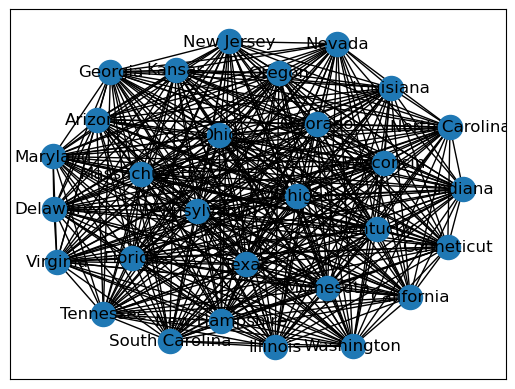

In [514]:
Huge_Graph = nx.from_pandas_edgelist(huge_network2, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Huge_Graph,with_labels=True)
print(Huge_Graph)

In [515]:
huge_network3 =huge_network2.loc[huge_network2[0] == 'Louisiana']
huge_network3

,0,b,Distance
601,Louisiana,Maryland,1180.9
602,Louisiana,Georgia,528.3
608,Louisiana,Massachusetts,1591.0
612,Louisiana,South Carolina,735.6
613,Louisiana,Ohio,979.3
614,Louisiana,New Hampshire,1648.0
615,Louisiana,Colorado,1230.6
617,Louisiana,Delaware,1247.8
618,Louisiana,Kentucky,798.0
619,Louisiana,Pennsylvania,1199.0


Graph with 22 nodes and 21 edges


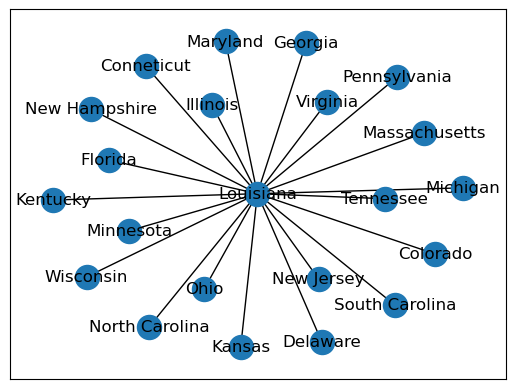

In [516]:
Huge_Graph2 = nx.from_pandas_edgelist(huge_network3, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Huge_Graph2,with_labels=True)
print(Huge_Graph2)

In [517]:
metrics_graph(graph=Huge_Graph2,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
0,Louisiana,0.000955
19,Florida,0.000680
2,Georgia,0.000645
14,Tennessee,0.000621
4,South Carolina,0.000572
18,Illinois,0.000563
9,Kentucky,0.000553
20,Kansas,0.000538
15,North Carolina,0.000511
5,Ohio,0.000505


Shortest path to production center:


,State,Shortest_path_to_production_facility
21,New Hampshire,1648.0
20,Massachusetts,1591.0
19,Conneticut,1487.2
18,New Jersey,1323.2
17,Delaware,1247.8
16,Colorado,1230.6
15,Minnesota,1213.5
14,Pennsylvania,1199.0
13,Maryland,1180.9
12,Michigan,1103.4


Average shortest path to production center:


1047.452380952381

Betweenness centrality for all nodes:


,State,Betweenness_centrality
0,Louisiana,1.0
1,Maryland,0.0
20,Kansas,0.0
19,Florida,0.0
18,Illinois,0.0
17,Minnesota,0.0
16,Virginia,0.0
15,North Carolina,0.0
14,Tennessee,0.0
13,Wisconsin,0.0


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
0,Louisiana,50602.921995
11,Conneticut,953.649154
6,New Hampshire,825.051424
3,Massachusetts,811.410000
10,Pennsylvania,699.616500
21,New Jersey,691.504320
8,Delaware,636.380496
7,Colorado,627.606000
1,Maryland,617.610700
17,Minnesota,616.700700


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
21,New Hampshire,1648.0,63800,105142400.0
20,Massachusetts,1591.0,1000000,1591000000.0
19,Conneticut,1487.2,14123800,21004915360.0
18,New Jersey,1323.2,2260000,2990432000.0
17,Delaware,1247.8,1000200,1248049560.0
16,Colorado,1230.6,1000000,1230600000.0
15,Minnesota,1213.5,820000,995070000.0
14,Pennsylvania,1199.0,8350000,10011650000.0
13,Maryland,1180.9,2300000,2716070000.0
12,Michigan,1103.4,1000000,1103400000.0


Total distance per product=


584.5886057064271

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Louisiana,0.000955,1.0,50602.921995,48.310475
1,Florida,0.000680,0.0,244.150720,0.000000
20,Massachusetts,0.000390,0.0,811.410000,0.000000
19,Conneticut,0.000406,0.0,953.649154,0.000000
18,New Jersey,0.000433,0.0,691.504320,0.000000
17,Delaware,0.000447,0.0,636.380496,0.000000
16,Colorado,0.000451,0.0,627.606000,0.000000
15,Minnesota,0.000454,0.0,616.700700,0.000000
14,Pennsylvania,0.000457,0.0,699.616500,0.000000
13,Maryland,0.000460,0.0,617.610700,0.000000


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE PENNSYLVANIA

In [518]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000
huge_network4 =huge_network2.loc[huge_network2[0] == 'Pennsylvania']
huge_network4

,0,b,Distance
1151,Pennsylvania,Maryland,107.9
1158,Pennsylvania,Massachusetts,396.8
1163,Pennsylvania,Ohio,378.9
1164,Pennsylvania,New Hampshire,453.9
1165,Pennsylvania,Colorado,1647.9
1167,Pennsylvania,Delaware,129.9
1170,Pennsylvania,Conneticut,293.0
1177,Pennsylvania,Michigan,546.7
1180,Pennsylvania,Wisconsin,813.7
1189,Pennsylvania,North Carolina,394.2


Graph with 22 nodes and 21 edges


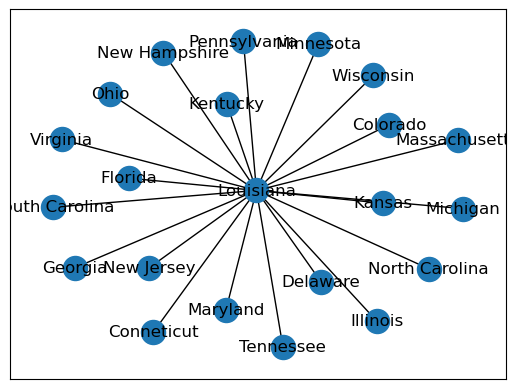

In [519]:
Huge_Graph2 = nx.from_pandas_edgelist(huge_network3, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Huge_Graph2,with_labels=True)
print(Huge_Graph2)

In [520]:
metrics_graph(graph=Huge_Graph2,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
0,Louisiana,0.000955
19,Florida,0.000680
2,Georgia,0.000645
14,Tennessee,0.000621
4,South Carolina,0.000572
18,Illinois,0.000563
9,Kentucky,0.000553
20,Kansas,0.000538
15,North Carolina,0.000511
5,Ohio,0.000505


Shortest path to production center:


,State,Shortest_path_to_production_facility
21,New Hampshire,2847.0
20,Massachusetts,2790.0
19,Conneticut,2686.2
18,New Jersey,2522.2
17,Delaware,2446.8
16,Colorado,2429.6
15,Minnesota,2412.5
14,Maryland,2379.9
13,Michigan,2302.4
12,Virginia,2286.8


Average shortest path to production center:


2189.3571428571427

Betweenness centrality for all nodes:


,State,Betweenness_centrality
0,Louisiana,1.0
1,Maryland,0.0
20,Kansas,0.0
19,Florida,0.0
18,Illinois,0.0
17,Minnesota,0.0
16,Virginia,0.0
15,North Carolina,0.0
14,Tennessee,0.0
13,Wisconsin,0.0


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
0,Louisiana,29526.804984
10,Pennsylvania,1199.000000
11,Conneticut,953.649154
6,New Hampshire,825.051424
3,Massachusetts,811.410000
21,New Jersey,691.504320
8,Delaware,636.380496
7,Colorado,627.606000
1,Maryland,617.610700
17,Minnesota,616.700700


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
21,New Hampshire,2847.0,63800,181638600.0
20,Massachusetts,2790.0,1000000,2790000000.0
19,Conneticut,2686.2,14123800,37939351560.0
18,New Jersey,2522.2,2260000,5700172000.0
17,Delaware,2446.8,1000200,2447289360.0
16,Colorado,2429.6,1000000,2429600000.0
15,Minnesota,2412.5,820000,1978250000.0
14,Maryland,2379.9,2300000,5473770000.0
13,Michigan,2302.4,1000000,2302400000.0
12,Virginia,2286.8,2300000,5259640000.0


Total distance per product=


1165.2392837003922

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Louisiana,0.000955,1.0,29526.804984,28.189162
1,Florida,0.000680,0.0,244.150720,0.000000
20,Massachusetts,0.000390,0.0,811.410000,0.000000
19,Conneticut,0.000406,0.0,953.649154,0.000000
18,New Jersey,0.000433,0.0,691.504320,0.000000
17,Delaware,0.000447,0.0,636.380496,0.000000
16,Colorado,0.000451,0.0,627.606000,0.000000
15,Minnesota,0.000454,0.0,616.700700,0.000000
14,Pennsylvania,0.000457,0.0,1199.000000,0.000000
13,Maryland,0.000460,0.0,617.610700,0.000000


# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE lOUISIANA

In [521]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000